In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(multivariate-normal-diagonal-covariance)=
# The Multivariate Normal - Diagonal Covariance Case

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\sigma_i$ are positive numbers.
This is known as the multivariate normal with diagonal covariance.
All the components of the vector are independent.
Let's first visualize the joint PDF of this random vector in 2D.
We are going to plot its contours.

In [3]:
import scipy.stats as st
import numpy as np
# The mean vector
mu = [1.0, 2.0]
# The variance of each component
sigma2 = [1.0, 1.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

Here is how you can sample from $X$.

In [4]:
X.rvs()

array([-0.80991631,  2.69009153])

Here is how you can evaluate the PDF at a point.

In [5]:
pdf_val_X = X.pdf([0.5, -1.0])
print(f"PDF at (0.5, -1.0) = {pdf_val_X:.3e}")

PDF at (0.5, -1.0) = 1.560e-03


Now, let's do the contour of the PDF.
We will do it slowlly.
It is very important to learn how to do contours in Python.

It takes three steps.
First, we need a grid of x1 and x2 points.

In [7]:
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create the grid
X1, X2 = np.meshgrid(x1, x2)
# These are 64 x 64 matrices
print(X1.shape)

(64, 64)


Here is how your grid looks like:

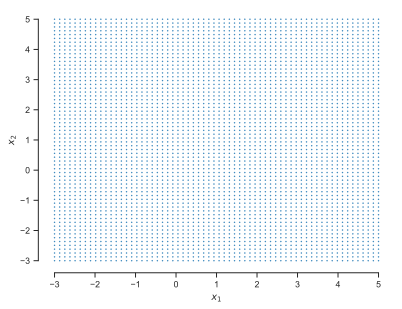

In [9]:
fig, ax = plt.subplots()
ax.plot(X1.flatten(), X2.flatten(), '.', markersize=1)
sns.despine(trim=True)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');

We are going to evaluate the PDF on all these points.
To this end, we create a (64^2) x 2 array of all the grid points by flattening X1 and X2:

In [10]:
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
print(X_flat.shape)

(4096, 2)


Now we can evaluate the PDF at all these points:

In [11]:
z = X.pdf(X_flat)
print(z.shape)
print(z)

(4096,)
[1.98968008e-10 3.28001464e-10 5.32065780e-10 ... 1.58606574e-06
 9.77758585e-07 5.93115274e-07]


We reshape z to 64 x 64:

In [12]:
Z = z.reshape((64, 64))
print(Z.shape)

(64, 64)


And now we can plot the contour:

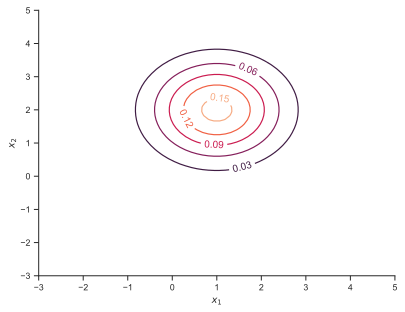

In [34]:
fig, ax = plt.subplots()
c = ax.contour(X1, X2, Z, levels=5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.clabel(c, inline=1, fontsize=10);
sns.despine(trim=True);

Now, let's take samples of X and add them in this figure:

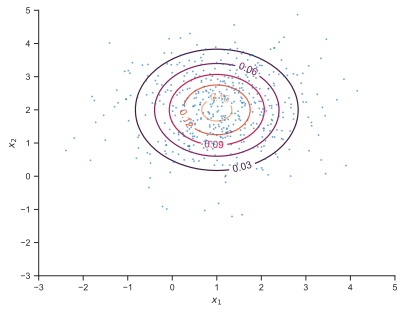

In [35]:
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2, alpha=0.5, label="samples")
fig

## Questions

+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\sigma_1^2 = 0.1$ and $\sigma_2^2 = 1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.01$. Observe how the contours of the PDF change.

(sampling-multivariate-diagonal-normal)=
## Sampling the multivariate normal with diagonal covariance using the standard normal

We will show how you can sample from a multivariate normal with diagonal covariance using samples from the standard normal.
Recall that in [Lecture 4](any-normal-from-standard-normal) we found a connection between any univariate normal and the standard normal.
We will now extend this to the multivariate case.
Let $\mathbf{Z}$ be an $N$-dimensional standard normal:

$$
\mathbf{Z} \sim N(0,\mathbf{I}),
$$

where $\mathbf{I}$ is the $N\times N$ unit matrix (all zeros except the diagonal which is all ones).
Define the random vector:

$$
\mathbf{X} = \boldsymbol{\mu} + \operatorname{diag}\left(\sigma_1, \dots,\sigma_N\right)\mathbf{Z}.
$$

Observe that its component $X_i$ is given by:

$$
X_i = \mu_i + \sigma_i Z_i.
$$

So, using what we learned in [Lecture 4](any-normal-from-standard-normal), we have:

$$
X_i \sim N\left(\mu_i, \sigma_i^2\right).
$$

Collectively, we have:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right).
$$

Let's verify this by creating samples of $\mathbf{X}$ using samples of $\mathbf{Z}$ and then plotting these samples together with the contours of $N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right)$.

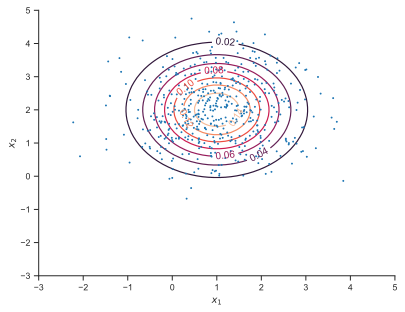

In [38]:
# The multivariate normal that you want to study:
# The mean vector
mu = [1.0, 2.0]
# The variance of each component
sigma2 = [1.0, 1.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

# The number of samples you want to take:
num_samples = 500
# Here is how you can sample from Z:
z_samples = np.random.randn(num_samples, 2)
# Transforms these to samples of X 
# (2-vector + (N x 2)-matrix * (2 x 2)-matrix = 2-vector + (N x 2)-matrix)
# = (N x 2)-matrix
# Please pay attention to the sqrt(Sigma)
# NOT just Sigma.
x_samples = mu + z_samples @ np.sqrt(Sigma)

# ******************************************************
# In case you missed it, "@" does matrix multiplication.
# ******************************************************

# Visualize everything
fig, ax = plt.subplots()
x1 = np.linspace(-3, 5, 64)
X1, X2 = np.meshgrid(x1, x1)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
pdf_X_flat = X.pdf(X_flat).reshape(X1.shape)
c = ax.contour(X1, X2, pdf_X_flat)
ax.clabel(c, inline=1, fontsize=10);
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=2
)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
sns.despine(trim=True);

## Questions

+ Rerun the steps above changing $\boldsymbol{\mu}, \sigma_1^2$ and $\sigma_2^2$ and observe that you are always getting the correct samples.